In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
plt.rcParams['font.size'] = 13
plt.rcParams['figure.figsize'] = [8,6]
import datetime as dt
import scipy.special as sf
import scipy.optimize as opt

In [2]:
%run Fraunhofer.py

16


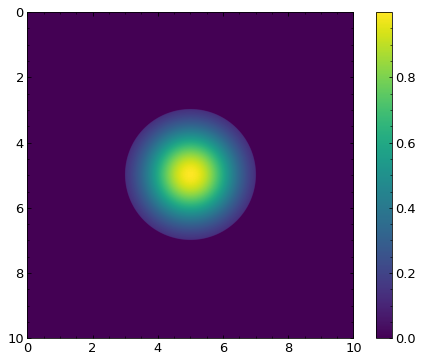

In [3]:
starttime = dt.datetime.now()
screen = {}
screen['N'] = 4096
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, 1.0)
InCircle(screen, center, 2.0)
# c2 = (center[0]-0.2, center[1]-0.1)
# CircleAtten(screen,c2,0.1,1.3)
# c2 = (center[0]+0.1, center[1]+0.3)
# CircleAtten(screen,c2,0.1,1/1.3)
# c2 = (center[0]+0.3, center[1]-0.1)
# CircleAtten(screen,c2,0.1,1.3)
# c2 = (center[0]-0.3, center[1]+0.2)
# CircleAtten(screen,c2,0.1,1/1.3)
ScreenFFT(screen)

lam = 0.002 #mm wavelength
kphot = 2*np.pi/lam
thetamaxdeg = 2.0
thetamax = 2*np.pi/180. # 2 degrees in radians
theta_vec = np.linspace(-thetamax,thetamax,1024) 
II0 = Project_I_on_thetagrid(theta_vec,screen,lam) 
plt.imshow(screen['E'],extent=(0,screen['D'],screen['D'],0))
plt.colorbar()
endtime = dt.datetime.now()
t = (endtime-starttime).seconds
print(t)

17


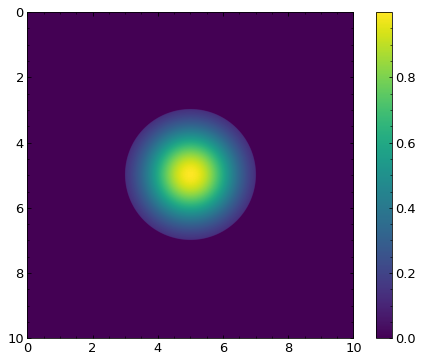

In [10]:
starttime = dt.datetime.now()
screen = {}
screen['N'] = 4096
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, 1.0) #sigma 1.0
InCircle(screen, center, 2.0) #radius 2.0
c2 = (center[0]-0.2, center[1]-0.1)
#c2 = (center[0], center[1])
CircleAtten(screen,c2,0.1,1.0*np.exp(np.pi/2*1j))
#c2 = (center[0]+0.1, center[1]+0.3)
#CircleAtten(screen,c2,0.1,1/1.3)
#c2 = (center[0]+0.3, center[1]-0.1)
#CircleAtten(screen,c2,0.1,1.3)
#c2 = (center[0]-0.3, center[1]+0.2)
#CircleAtten(screen,c2,0.1,1/1.3)
ScreenFFT(screen)

lam = 0.002 #mm wavelength
kphot = 2*np.pi/lam
thetamaxdeg = 2.0
thetamax = 2*np.pi/180. # 2 degrees in radians
theta_vec = np.linspace(-thetamax,thetamax,1024) 
II0 = Project_I_on_thetagrid(theta_vec,screen,lam) 
plt.rcParams['figure.figsize'] = [8,6]
plt.imshow(np.abs(screen['E']),extent=(0,screen['D'],screen['D'],0)) # added np.abs for imaginary E
plt.colorbar()
endtime = dt.datetime.now()
t = (endtime-starttime).seconds
print(t)

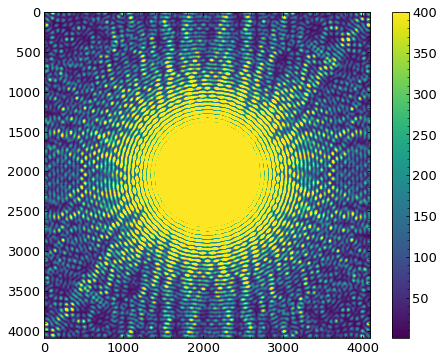

In [6]:
plt.rcParams['figure.figsize'] = [8,6]
plt.imshow(screen['I'], vmax=400)
plt.colorbar()

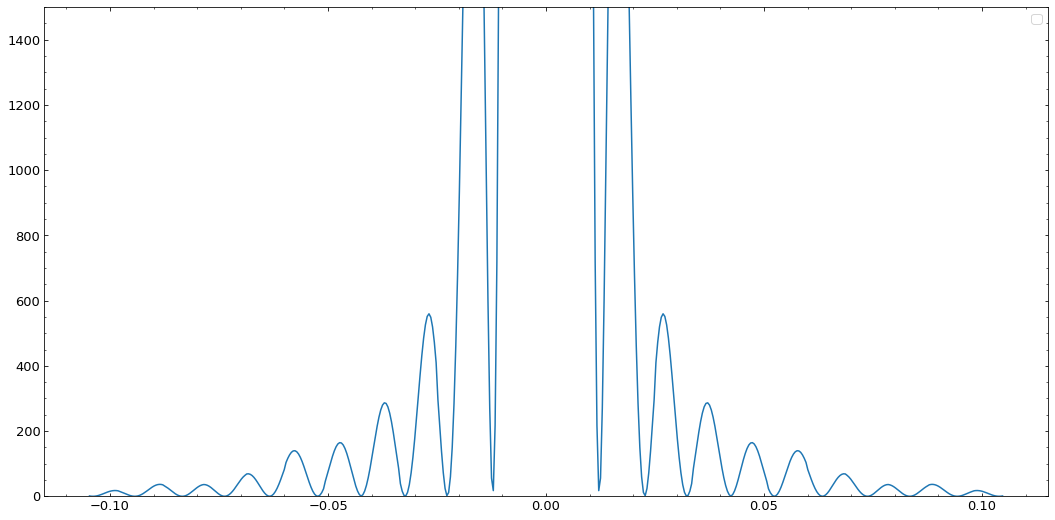

In [ ]:
#
def airy(x,A,k):
    jinc = sf.jn(1,k*x) / (k*x)
    airy = np.abs(A * jinc)
    return(airy)

#(fit,err) = opt.curve_fit(airy, np.append(theta_vec[:460],theta_vec[540:]), np.append(II1[500][:460],II1[500][540:]), absolute_sigma=True)
#(fit,err) = opt.curve_fit(airy, theta_vec, II1[500], absolute_sigma=True)
#plt.plot(theta_vec, airy(theta_vec,fit[0]/3,fit[1]),color='red',label='fit')

plt.rcParams['figure.figsize'] = [18,9]
plt.plot(theta_vec, II1[256])
#plt.xlim(4.9,6.5)
plt.ylim(0, 1500)
plt.legend()

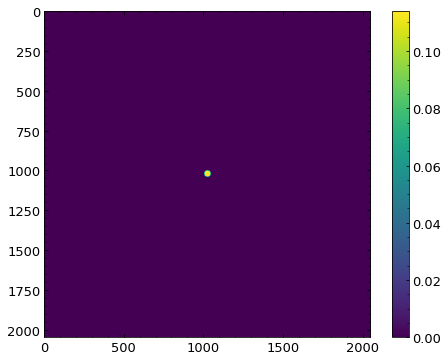

In [ ]:
plt.imshow(np.log10(np.abs(np.fft.ifft2(screen['FFT_E']))))
plt.colorbar()


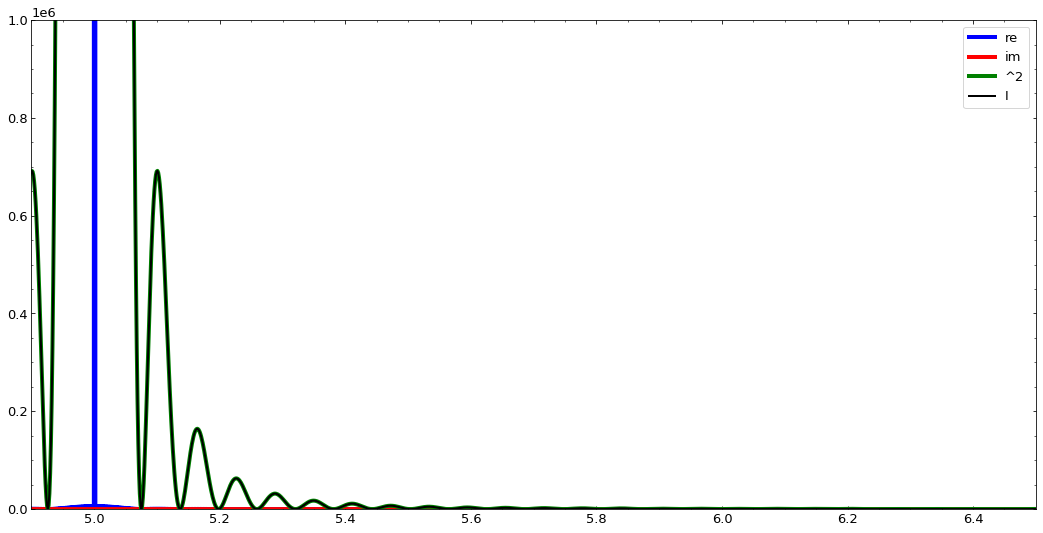

In [ ]:
# middle row
plt.rcParams['figure.figsize'] = [18,9]
plt.plot(screen['X'][0], np.real(screen['FFT_E'])[int(len(screen['FFT_E'][0])/2)],color='blue', lw=4,label='re')
plt.plot(screen['X'][0], np.imag(screen['FFT_E'])[int(len(screen['FFT_E'][0])/2)],color='red', lw=4,label='im')
plt.plot(screen['X'][0], (np.abs(screen['FFT_E'])[int(len(screen['FFT_E'][0])/2)])**2,color='green', lw=4,label='^2')
plt.plot(screen['X'][0], screen['I'][int(len(screen['I'][0])/2)],color='black', lw=2,label='I')

plt.xlim(4.9,6.5)
plt.ylim(-450, 1e5)
plt.legend()

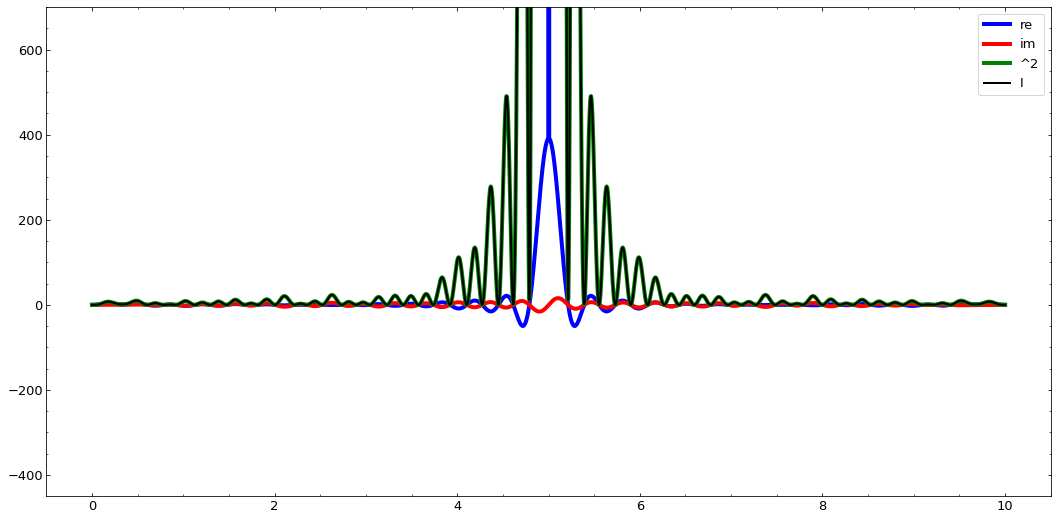

In [ ]:
## diagonal
plt.rcParams['figure.figsize'] = [18,9]
plt.plot(np.diag(screen['X']), np.real(np.diag(screen['FFT_E'])),color='blue', lw=4,label='re')
plt.plot(np.diag(screen['X']), np.imag(np.diag(screen['FFT_E'])),color='red', lw=4,label='im')
plt.plot(np.diag(screen['X']), (np.abs(np.diag(screen['FFT_E'])))**2,color='green', lw=4,label='^2')
plt.plot(np.diag(screen['X']), np.diag(screen['I']),color='black', lw=2,label='I')

#plt.xlim(4.9,6.5)
plt.ylim(-450, 700)
plt.legend()

In [ ]:
screen1 = screen.copy()

(0.0, 700.0)

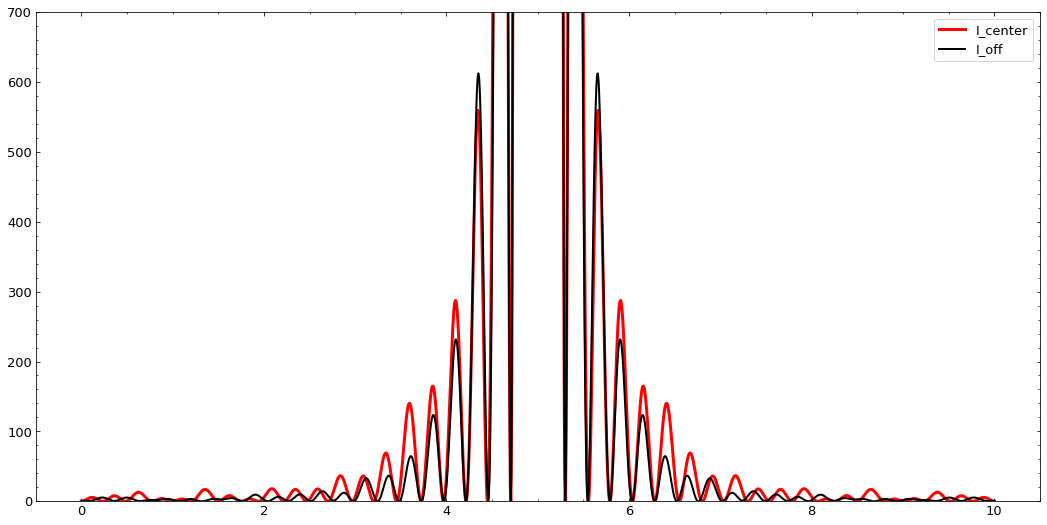

In [ ]:
plt.plot(screen['X'][0], screen['I'][int(len(screen['I'][0])/2)],color='red', lw=3,label='I_center')
plt.plot(screen1['X'][0], screen1['I'][int(len(screen1['I'][0])/2)],color='black', lw=2,label='I_off')
plt.legend()
plt.ylim(0,700)

In [ ]:
# expected bessel function of FFT(circle), need to adjust the amplitude & x0, but we only care about the minumum position here.
def airy(x,x0,A):
    jinc = A*sf.jn(1,2*np.pi*(x-x0)) / (2*np.pi*(x-x0))
    airy = np.abs(A * jinc)
    return(airy**2)

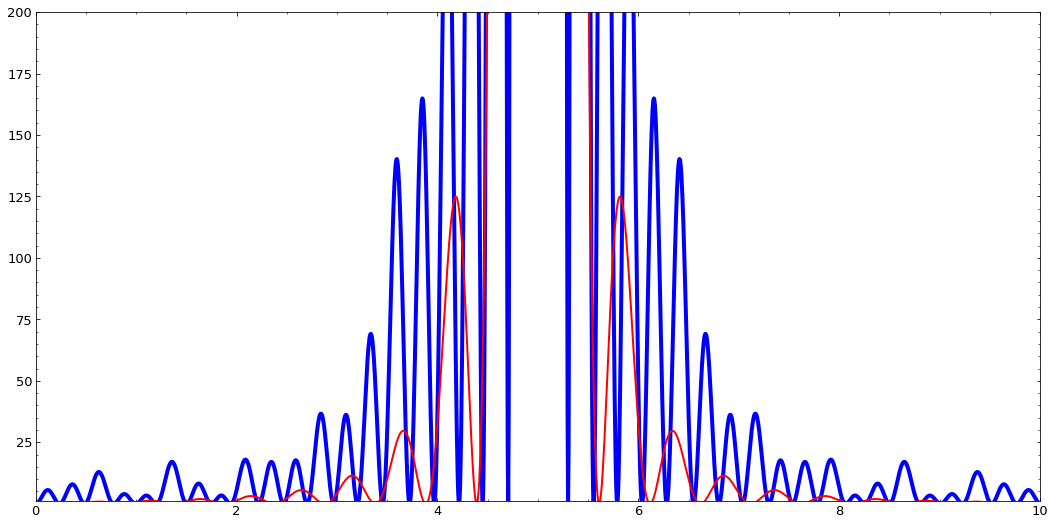

In [ ]:
plt.plot(screen['X'][0], screen['I'][int(len(screen['I'][0])/2)],color='blue', lw=4)
plt.xlim(0,10)
plt.ylim(1, 200)
plt.plot(screen['X'][0], airy(screen['X'][0], 5,13),color='red', lw=2)

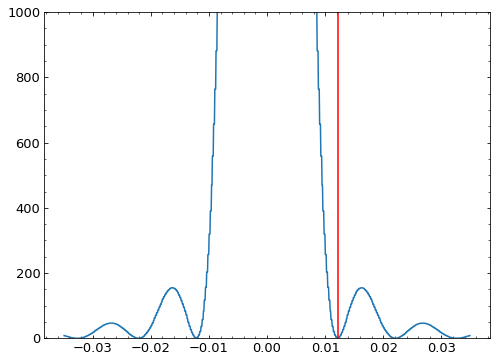

In [ ]:
theta_min = 1.22*lam/0.2
plt.plot(theta_vec, II1[int(len(theta_vec)/2)])
plt.ylim(0,1000)
plt.axvline(x=theta_min,color='red')

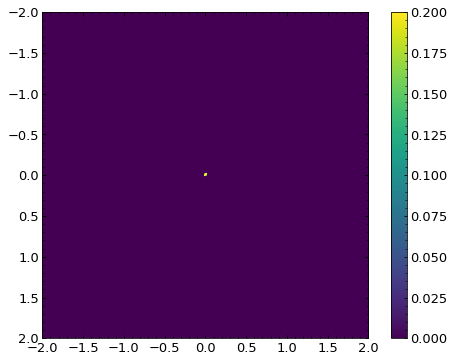

In [ ]:

plt.imshow(np.abs(II1/np.max(II1)),vmax=0.2,interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg]) 
plt.colorbar()

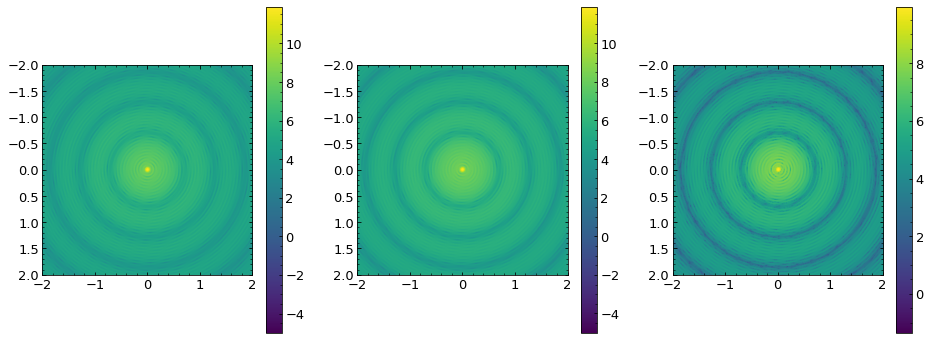

In [12]:
Idiff = II1-II0
plt.rcParams['figure.figsize'] = [16, 6]
plt.subplot(1,3,1)
plt.imshow(np.log10(np.abs(II0)), vmin=-5,interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg])
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.log10(np.abs(II1)), vmin=-5, interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg])
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.log10(np.abs(Idiff)),interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg])
plt.colorbar()

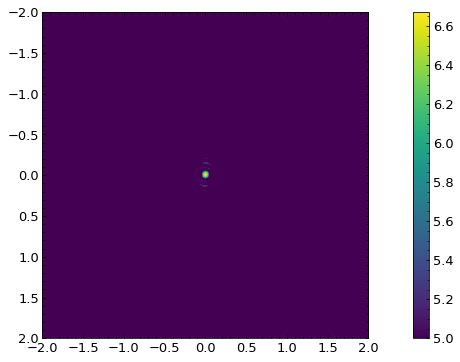

In [ ]:
plt.imshow(np.log10(np.abs(Idiff)),vmin=5,interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg])
plt.colorbar()

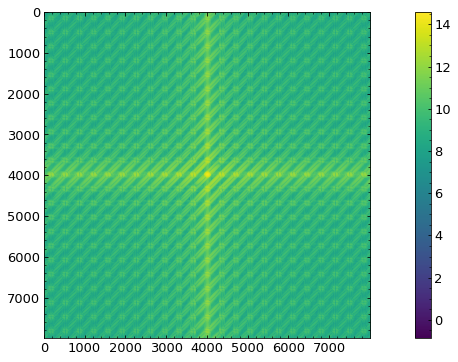

In [ ]:
psd0 = np.fft.fftshift(np.abs(np.fft.fft2(II0))) 
psd1 = np.fft.fftshift(np.abs(np.fft.fft2(II1)))
plt.imshow(np.log10(np.abs(psd1-psd0)))
plt.colorbar()

# No interpolation, test the position of minima on theta space
one to one mapped screen, no scaling/ stretching, same size of the screen in both x,y space and thetax,thetay space).

from original number of points on the screen N, use dk to find the kx_grid max (or, directly screen['kx'].max()), then convert to the max angle. Then form thetax/y_grid, then kx/y_grid

In [ ]:
lam = 0.002 #m wavelength
kphot = 2*np.pi/lam
N = screen['kx'].shape[0]
kmax = screen['kx'].max()
theta_max = np.arcsin(kmax/kphot)
theta_max_deg = np.degrees(theta_max)
theta_vec = np.linspace(-theta_max, theta_max, 1022)
thetax_grid, thetay_grid = np.meshgrid(theta_vec,theta_vec)
thetay_grid = np.flipud(thetay_grid)


#thetamaxdeg = 2.0
#thetamax = 2*np.pi/180. # 2 degrees in radians


    #kx_grid = kphot*thetax_grid/(np.pi/2) # fix this
    #ky_grid = kphot*thetay_grid/(np.pi/2)
kx_grid = kphot*np.sin(thetax_grid) 
ky_grid = kphot*np.sin(thetay_grid)




In [ ]:
def Project_I_on_thetagrid(theta_vec,screen,lam):
    #
    kphot = 2*np.pi/lam
    N_thetagrid = screen['N']
    thetax_grid, thetay_grid = np.meshgrid(theta_vec,theta_vec)
    thetay_grid = np.flipud(thetay_grid)
    #kx_grid = kphot*thetax_grid/(np.pi/2) # fix this
    #ky_grid = kphot*thetay_grid/(np.pi/2)
    kx_grid = kphot*np.sin(thetax_grid) 
    ky_grid = kphot*np.sin(thetay_grid)
    I_grid = np.zeros((N_thetagrid, N_thetagrid))
    
    dk = screen['kx'][0,1]-screen['kx'][0,0]
    for xx in range(N_thetagrid):
        for yy in range(N_thetagrid):
            kx = kx_grid[yy,xx]
            ky = ky_grid[yy,xx]
            #
            nx = kx/dk + screen['N']/2  # what element is this in the screen's kx,ky
            ny = ky/dk + screen['N']/2
            #
            # find the four values of kx,ky that surround
            nx1 = int(np.floor(nx))
            nx2 = int(np.ceil(nx))
            ny1 = int(np.floor(ny))
            ny2 = int(np.ceil(ny))
            # Go through four points surrounding our grid point's position and take weighted average.
            numsum = 0
            denomsum = 0
            for pt in [(nx1,ny1), (nx1,ny2), (nx2,ny1), (nx2,ny2)]:
                rr2 = (kx - screen['kx'][pt[0],pt[1]])**2 + (ky - screen['ky'][pt[0],pt[1]])**2
                w = 1/rr2
                numsum += w*screen['I'][pt[0],pt[1]]
                denomsum += w
                #
                #numsum += screen['I'][pt[0],pt[1]]
                #denomsum += 1
            I_grid[xx,yy] = numsum/denomsum
            #I_grid[xx,yy] = screen['I'][nx2,ny1]
        
    return I_grid
def tryyy(theta_vec,screen,lam):
    # Run after you've calculated the intensity as a function of kx, ky.
    # thetavec = 1D array of positions to be used for thetax, and for thetay
    #
    # Make 2D arrays of thetax, thetay coordinate for our map
    # We use the "_grid" suffix to indicate things that are 2D arrays associated
    # with the (new) thetax_grid, thetay_grid created next.
    N_thetagrid = len(theta_vec)
    thetax_grid, thetay_grid = np.meshgrid(theta_vec,theta_vec)
    thetay_grid = np.flipud(thetay_grid)
    #
    kphot = 2*np.pi/lam    # photon k vector.
    #
    # Find kx and ky at each (thetax,thetay) grid spot
    #
    #kx_grid = kphot*thetax_grid/(np.pi/2) # fix this
    #ky_grid = kphot*thetay_grid/(np.pi/2)
    kx_grid = kphot*np.sin(thetax_grid) 
    ky_grid = kphot*np.sin(thetay_grid)
    #
    # Now look at the original kx,ky map of our FT screen.
    #
    I_grid = np.zeros((N_thetagrid, N_thetagrid))
    
    dk = screen['kx'][0,1]-screen['kx'][0,0]
    for xx in range(N_thetagrid):
        for yy in range(N_thetagrid):
            kx = kx_grid[yy,xx]
            ky = ky_grid[yy,xx]
            #
            nx = kx/dk + screen['N']/2  # what element is this in the screen's kx,ky
            ny = ky/dk + screen['N']/2
            #
            # find the four values of kx,ky that surround
            nx1 = int(np.floor(nx))
            nx2 = int(np.ceil(nx))
            ny1 = int(np.floor(ny))
            ny2 = int(np.ceil(ny))
            # Go through four points surrounding our grid point's position and take weighted average.
            numsum = 0
            denomsum = 0
            #print((nx1,ny1),(nx2,ny2))
            n = np.array([nx1,nx2,ny1,ny2])
            if n.max()>(N_thetagrid-1):
              I_grid[xx,yy] = 1 #? maybe the average?
            else:
              for pt in [(nx1,ny1), (nx1,ny2), (nx2,ny1), (nx2,ny2)]:
                rr2 = (kx - screen['kx'][pt[0],pt[1]])**2 + (ky - screen['ky'][pt[0],pt[1]])**2
                w = 1/rr2
                numsum += w*screen['I'][pt[0],pt[1]]
                denomsum += w
                #numsum += screen['I'][pt[0],pt[1]]
                #denomsum += 1
                I_grid[xx,yy] = numsum/denomsum
                #I_grid[xx,yy] = screen['I'][nx2,ny1]
        
    return I_grid

In [ ]:
a = np.array([1,2,3,4])
a.max()

4

In [ ]:
kphot = 2*np.pi/lam
dk = screen['kx'][0,1]-screen['kx'][0,0]
N_thetagrid = screen['kx'].shape[0]
kmax = screen['kx'].max()-dk
theta_max = np.arcsin(kmax/kphot)
theta_max_deg = np.degrees(theta_max)
theta_vec = np.linspace(-theta_max, theta_max, 1024)

In [ ]:
print(kx_grid.max())
print(screen['kx'][3,3])
print(screen['kx'])

321.0707691968769
0.6283185307179586
[[-1.25663706 -0.62831853  0.          0.62831853]
 [-1.25663706 -0.62831853  0.          0.62831853]
 [-1.25663706 -0.62831853  0.          0.62831853]
 [-1.25663706 -0.62831853  0.          0.62831853]]


In [ ]:
starttime = dt.datetime.now()
screen = {}
screen['N'] = 1024
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
#MultByGaussian(screen, center, 0.5)
#InCircle(screen, center, 1.0)
#c2 = (center[0]-0.2, center[1]-0.1)
c2 = (center[0], center[1])
CircleAtten(screen,c2,0.1,1.3)
# c2 = (center[0]+0.1, center[1]+0.3)
# CircleAtten(screen,c2,0.1,1/1.3)
# c2 = (center[0]+0.3, center[1]-0.1)
# CircleAtten(screen,c2,0.1,1.3)
# c2 = (center[0]-0.3, center[1]+0.2)
# CircleAtten(screen,c2,0.1,1/1.3)
ScreenFFT(screen)


#II1 = Project_I_on_thetagrid(theta_vec,screen,lam) 
II1 = tryyy(theta_vec,screen,lam)
# endtime = dt.datetime.now()
# t = (endtime-starttime).seconds
# print(t)

# plt.imshow(screen['E'],extent=(0,screen['D'],screen['D'],0))
# plt.colorbar()

(1.0, 200.0)

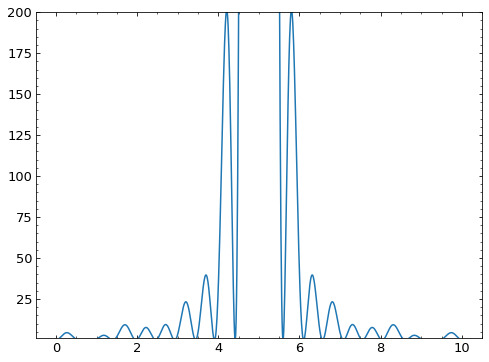

In [ ]:
plt.plot(screen['X'][0], screen['I'][int(len(screen['I'][0])/2)])
#plt.xlim(5,6)
plt.ylim(1, 200)
#screen['I'][2048][500]

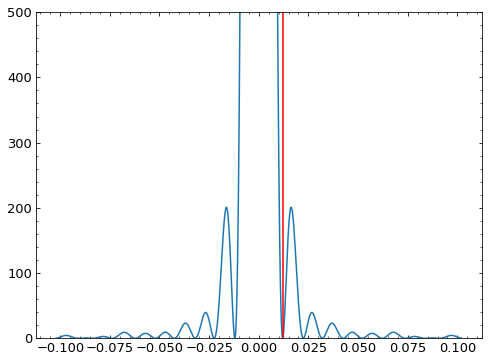

In [ ]:
plt.plot(theta_vec, II1[int(len(theta_vec)/2)])
plt.ylim(0,500)
plt.axvline(x=theta_min,color='red')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


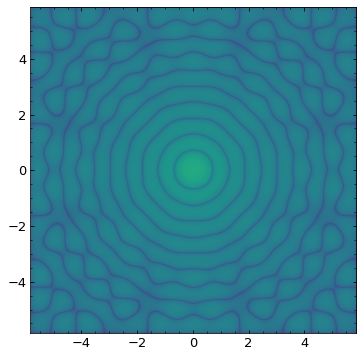

In [ ]:
plt.imshow(np.log10(screen['I']),extent=[-theta_max_deg,theta_max_deg,-theta_max_deg,theta_max_deg])